# Assignment is below. 

In [3]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


from sklearn.linear_model import LogisticRegression as Model

Read in the Kobe Bryant shooting data [https://www.kaggle.com/c/kobe-bryant-shot-selection]

In [4]:
kobe = pd.read_csv(r'C:\Users\carlb\Desktop\mlnn\data\kobe.csv')
kobe.dropna(inplace=True)

In [5]:
list(kobe.columns)

['action_type',
 'combined_shot_type',
 'game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'season',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_id',
 'team_name',
 'game_date',
 'matchup',
 'opponent',
 'shot_id']

For now, use just the numerical datatypes. They are below as `num_columns`

In [6]:
kobe.shot_zone_area.value_counts()

Center(C)                11289
Right Side Center(RC)     3981
Right Side(R)             3859
Left Side Center(LC)      3364
Left Side(L)              3132
Back Court(BC)              72
Name: shot_zone_area, dtype: int64

In [7]:
kobe.shot_zone_range.value_counts()

Less Than 8 ft.    7857
16-24 ft.          6907
8-16 ft.           5580
24+ ft.            5281
Back Court Shot      72
Name: shot_zone_range, dtype: int64

In [8]:
kobe.shot_zone_basic.value_counts()

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64

In [9]:
kobe

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12


In [10]:
kobe.shot_made_flag.value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

In [11]:
kobe.shot_made_flag.value_counts(normalize=False)

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [12]:
num_columns = [col for col, dtype in zip(kobe.columns, kobe.dtypes) if dtype != 'object']
num_columns

['game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'team_id',
 'shot_id']

## The `shot_made_flag` is the result (0 or 1) of the shot that Kobe took. Some of the values are missing (e.g. `NaN`) but we *_dropped_* them.

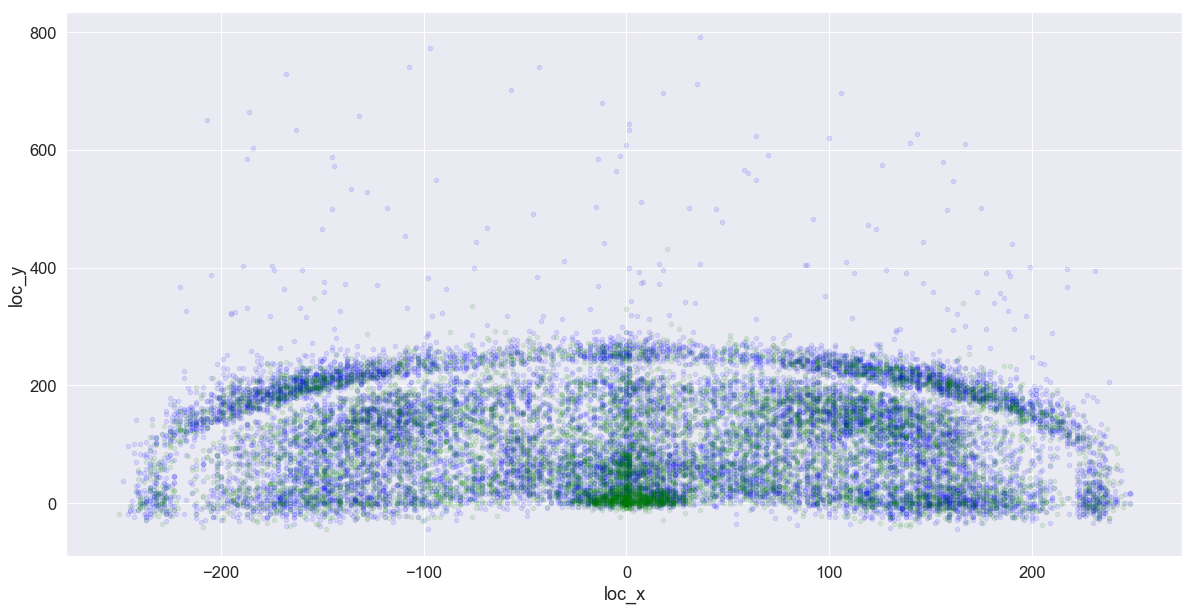

In [13]:
fig, ax = plt.subplots()
kobe[kobe.shot_made_flag==0].plot(kind='scatter', x='loc_x', y='loc_y', color='blue', alpha=0.1, ax=ax)
kobe[kobe.shot_made_flag==1].plot(kind='scatter', x='loc_x', y='loc_y', color='green', alpha=0.1, ax=ax)
# plt.scatter(kobe.loc_x, kobe.loc_y, alpha=0.2)

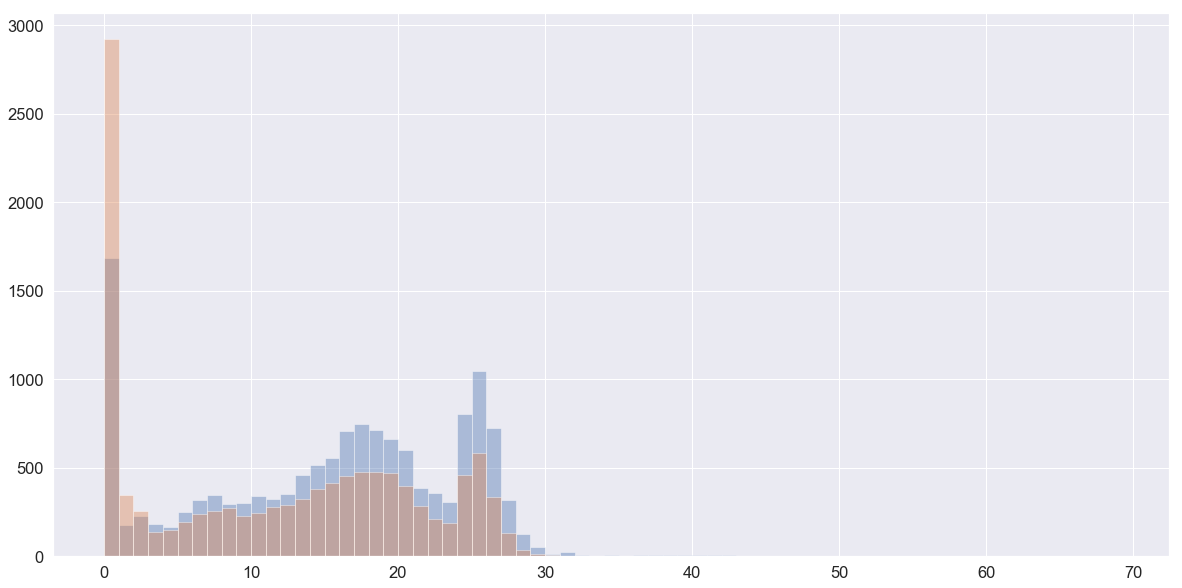

In [14]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

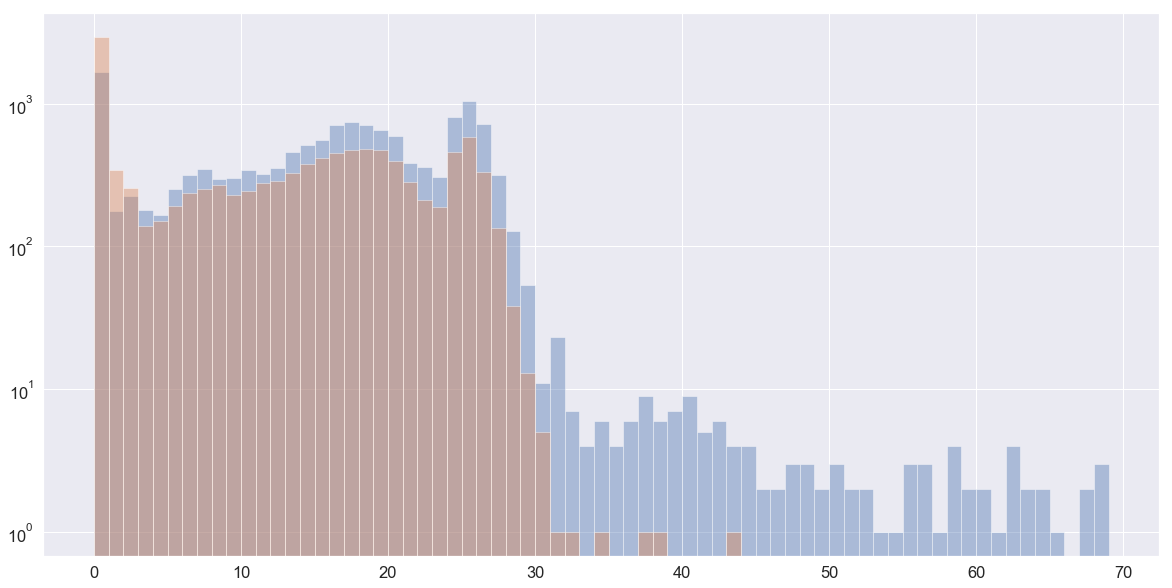

In [15]:
kobe[kobe.shot_made_flag==0].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4, log=True)

In [20]:
# fit a linear regression model and store the predictions
feature_cols = ['shot_distance', 'minutes_remaining']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())


0.5975405689380083

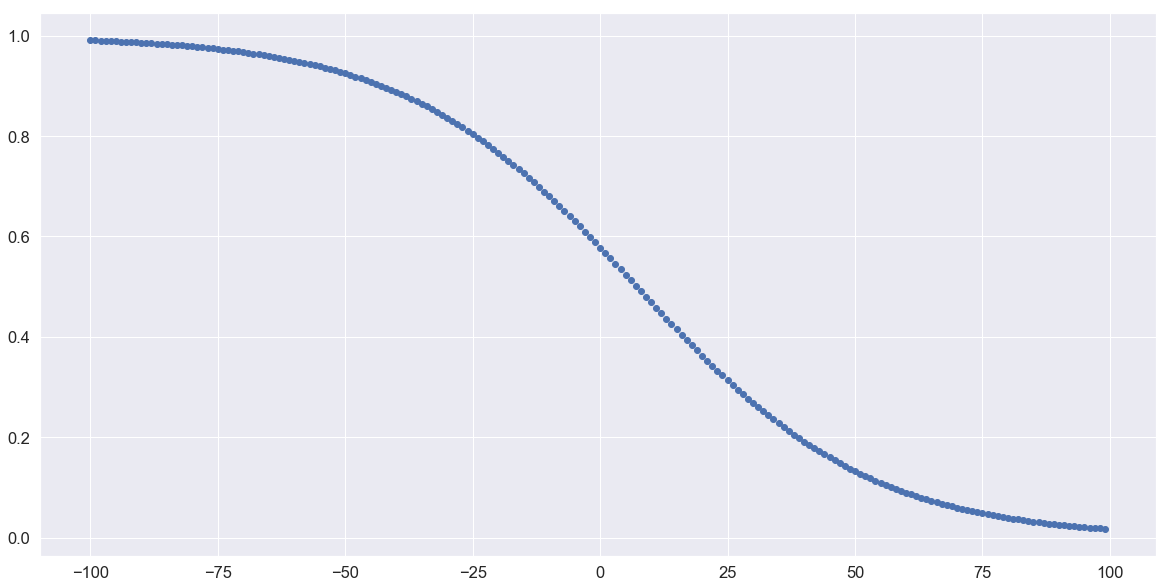

In [17]:
distances = np.arange(-100, 100)
minutes = np.array([0]*200)
x_trial = np.column_stack((distances, minutes))
model.predict_proba(x_trial)
plt.scatter(distances, model.predict_proba(x_trial)[:,1])


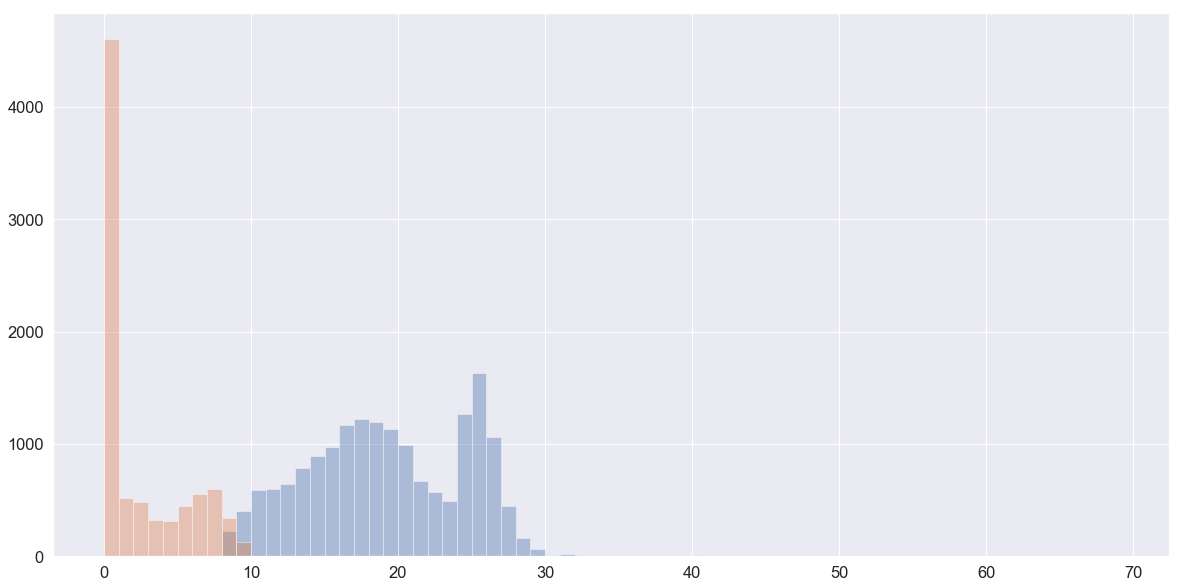

In [18]:
kobe[(kobe.pred==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

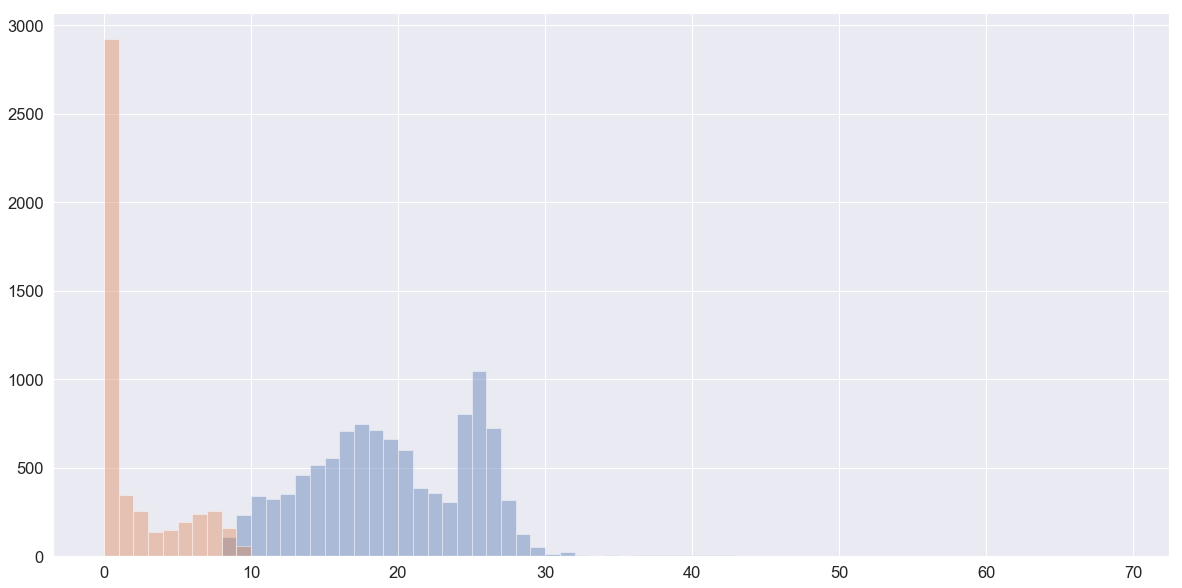

In [19]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

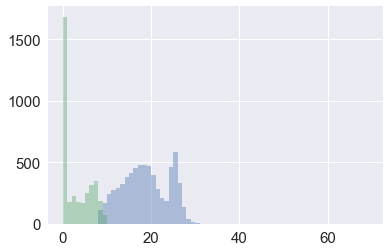

In [19]:
kobe[(kobe.pred==0) & (kobe.shot_made_flag==1)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)
kobe[(kobe.pred==1) & (kobe.shot_made_flag==0)].shot_distance.hist(bins=np.arange(0,70,1), alpha=.4)

Text(0,0.5,'made')

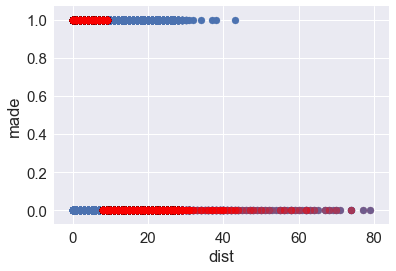

In [20]:
# scatter plot that includes the regression line
plt.scatter(kobe.shot_distance, kobe.shot_made_flag)
plt.scatter(kobe.shot_distance, kobe.pred, color='red', alpha=.2)
plt.xlabel('dist')
plt.ylabel('made')

## The following is a reminder of how the SciKit-Learn Models can be interfaced

In [21]:
from sklearn.linear_model import LogisticRegression as Model
# from sklearn.tree import DecisionTreeClassifier as Model
# from sklearn.ensemble import RandomForestClassifier as Model
model = Model()

from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )
from sklearn.metrics import *
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=0)

cross_validation.cross_val_score(model, X, y, cv=10)


C:\Users\cbroker1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([0.59237651, 0.59354337, 0.59299611, 0.59688716, 0.61750973,
       0.58388478, 0.60334761, 0.60918645, 0.60140132, 0.58388478])

# Assignment

### Warmup. Perform some analysis on Kobe's shot selection. Ask and answer (with charts) questions such as: Does Kobe make more shots in the 4th quarter than on average? Does Kobe make more shots from the left more than the right? What was Kobe's best year for shooting percentage? Etc. The more naunced the more you'll have a feel for the data.

0.44616103047048294
0.4137018037398643


Text(0.5,1,'Total vs. Period 4 Averages')

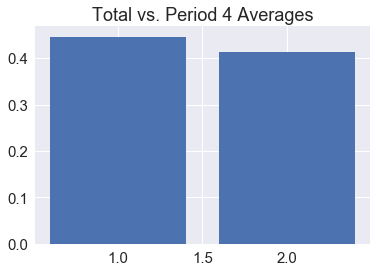

In [22]:
#Does Kobe make more shots in the 4th quarter than on average?

#All periods
average_all_periods = sum(kobe.shot_made_flag)/len(kobe.shot_made_flag)
print(average_all_periods)

#4th Quarter
kobe_period_4 = kobe[kobe.period == 4]
average_4th_period = sum(kobe_period_4.shot_made_flag)/len(kobe_period_4.shot_made_flag)
print(average_4th_period)

x=[1,2]
y=[0.44616103047048294,0.4137018037398643]


plt.bar(x,y)
plt.title('Total vs. Period 4 Averages')

Text(0.5,1,'Side of Court vs Shot Success')

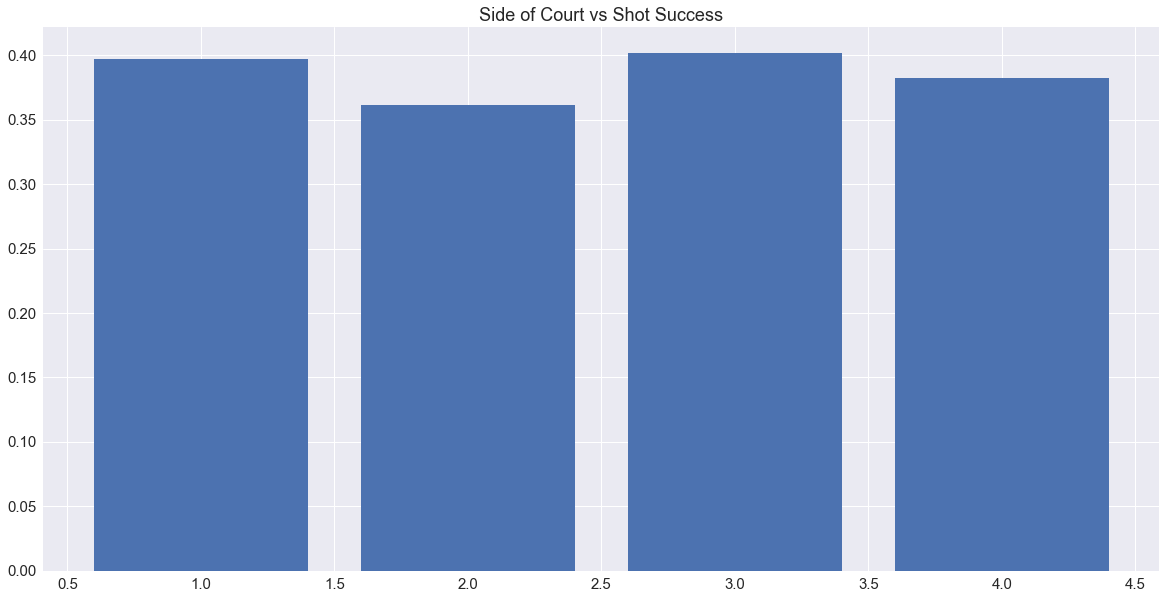

In [69]:
#Does Kobe make more shots from the left more than the right?

kobe_left = kobe[kobe.shot_zone_area == 'Left Side(L)']
kobe_left_2 = kobe[kobe.shot_zone_area == 'Left Side Center(LC)']

kobe_right = kobe[kobe.shot_zone_area == 'Right Side(R)']
kobe_right_2 = kobe[kobe.shot_zone_area == 'Right Side Center(RC)']

average_left= sum(kobe_left.shot_made_flag)/len(kobe_left.shot_made_flag)
average_left_2= sum(kobe_left_2.shot_made_flag)/len(kobe_left_2.shot_made_flag)
average_right= sum(kobe_right.shot_made_flag)/len(kobe_right.shot_made_flag)
average_right_2= sum(kobe_right_2.shot_made_flag)/len(kobe_right_2.shot_made_flag)

x2=[1,2,3,4]
y2=[average_left,average_left_2,average_right,average_right_2]

plt.bar(x2,y2)
plt.title('Side of Court vs Shot Success')

Text(0,0.5,'Shot Success')

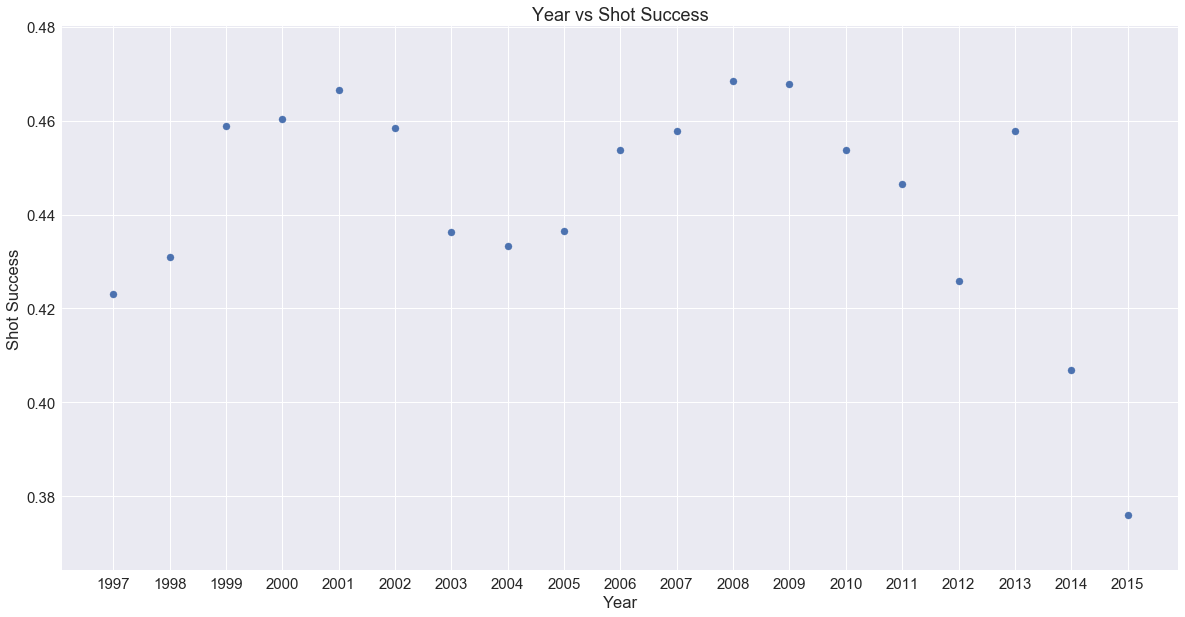

In [70]:
#What was Kobe's best year for shooting percentage?

kobe_1996_97= kobe[kobe.season == '1996-97']
kobe_1997_98= kobe[kobe.season == '1997-98']
kobe_1998_99= kobe[kobe.season == '1998-99']
kobe_1999_00= kobe[kobe.season == '1999-00']
kobe_2000_01= kobe[kobe.season == '2000-01']
kobe_2001_02= kobe[kobe.season == '2001-02']
kobe_2002_03= kobe[kobe.season == '2002-03']
kobe_2003_04= kobe[kobe.season == '2003-04']
kobe_2004_05= kobe[kobe.season == '2004-05']
kobe_2005_06= kobe[kobe.season == '2005-06']
kobe_2006_07= kobe[kobe.season == '2006-07']
kobe_2007_08= kobe[kobe.season == '2007-08']
kobe_2008_09= kobe[kobe.season == '2008-09']
kobe_2009_10= kobe[kobe.season == '2009-10']
kobe_2010_11= kobe[kobe.season == '2010-11']
kobe_2011_12= kobe[kobe.season == '2011-12']
kobe_2012_13= kobe[kobe.season == '2012-13']
kobe_2013_14= kobe[kobe.season == '2013-14']
kobe_2014_15= kobe[kobe.season == '2014-15']
kobe_2015_16= kobe[kobe.season == '2015-16']

average_1996_97= sum(kobe_1996_97.shot_made_flag)/len(kobe_1996_97.shot_made_flag)
average_1997_98= sum(kobe_1997_98.shot_made_flag)/len(kobe_1997_98.shot_made_flag)
average_1998_99= sum(kobe_1998_99.shot_made_flag)/len(kobe_1998_99.shot_made_flag)
average_1999_00= sum(kobe_1999_00.shot_made_flag)/len(kobe_1999_00.shot_made_flag)
average_2000_01= sum(kobe_2000_01.shot_made_flag)/len(kobe_2000_01.shot_made_flag)
average_2001_02= sum(kobe_2001_02.shot_made_flag)/len(kobe_2001_02.shot_made_flag)
average_2002_03= sum(kobe_2002_03.shot_made_flag)/len(kobe_2002_03.shot_made_flag)
average_2004_05= sum(kobe_2003_04.shot_made_flag)/len(kobe_2003_04.shot_made_flag)
average_2005_06= sum(kobe_2004_05.shot_made_flag)/len(kobe_2004_05.shot_made_flag)
average_2006_07= sum(kobe_2005_06.shot_made_flag)/len(kobe_2005_06.shot_made_flag)
average_2007_08= sum(kobe_2006_07.shot_made_flag)/len(kobe_2006_07.shot_made_flag)
average_2008_09= sum(kobe_2007_08.shot_made_flag)/len(kobe_2007_08.shot_made_flag)
average_2009_10= sum(kobe_2008_09.shot_made_flag)/len(kobe_2008_09.shot_made_flag)
average_2010_11= sum(kobe_2009_10.shot_made_flag)/len(kobe_2009_10.shot_made_flag)
average_2011_12= sum(kobe_2010_11.shot_made_flag)/len(kobe_2010_11.shot_made_flag)
average_2012_13= sum(kobe_2011_12.shot_made_flag)/len(kobe_2011_12.shot_made_flag)
average_2013_14= sum(kobe_2012_13.shot_made_flag)/len(kobe_2012_13.shot_made_flag)
average_2014_15= sum(kobe_2013_14.shot_made_flag)/len(kobe_2013_14.shot_made_flag)
average_2015_16= sum(kobe_2014_15.shot_made_flag)/len(kobe_2014_15.shot_made_flag)

x3=[1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
y3=[average_1996_97,
    average_1997_98,
    average_1998_99,
    average_1999_00,
    average_2000_01,
    average_2001_02,
    average_2002_03,
    average_2004_05,
    average_2005_06,
    average_2006_07,
    average_2007_08,
    average_2008_09,
    average_2009_10,
    average_2010_11,
    average_2011_12,
    average_2012_13,
    average_2013_14,
    average_2014_15,
    average_2015_16]

plt.scatter(x3,y3, s=50)
plt.title('Year vs Shot Success')
plt.xlabel('Year')
plt.xticks([1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])
plt.ylabel('Shot Success')


### 1. Create a new column called `abs_x` that is equal to the absolute value of loc_x. Plot a histogram of made shots and missed shots using this variable. Explain in detail (with graphics and evidence) why this could be a better feature/column to use in a Logsitic Regression model instead of `loc_x`.

Text(0,0.5,'Shot Success')

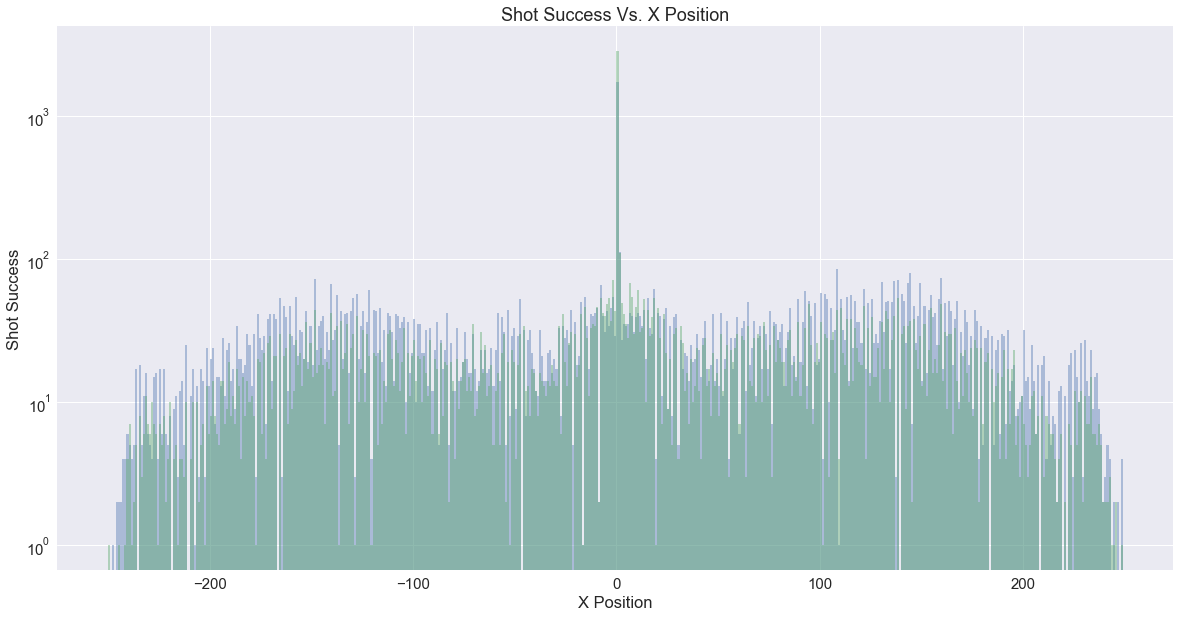

In [65]:
#Histogram of loc_x
kobe[kobe.shot_made_flag==0].loc_x.hist(bins=np.arange(-250,250,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].loc_x.hist(bins=np.arange(-250,250,1), alpha=.4, log=True)
plt.title('Shot Success Vs. X Position')
plt.xlabel('X Position')
plt.ylabel('Shot Success')

Text(0,0.5,'Shot Success')

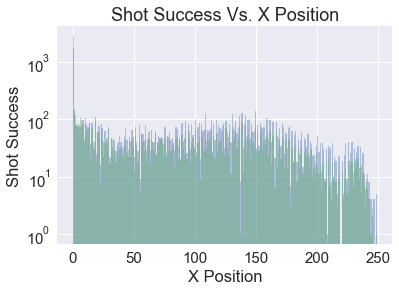

In [27]:
#Histogram of abs_x
kobe['abs_x'] = kobe['loc_x'].abs()
kobe[kobe.shot_made_flag==0].abs_x.hist(bins=np.arange(0,250,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].abs_x.hist(bins=np.arange(0,250,1), alpha=.4, log=True)
plt.title('Shot Success Vs. X Position')
plt.xlabel('X Position')
plt.ylabel('Shot Success')

In [28]:
#loc_x logistic regression model predictions
feature_cols = ['loc_y','loc_x']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(kobe.shot_made_flag, kobe.pred.round())

In [29]:
#abs_x logistic regression model predictions
feature_cols = ['loc_y','abs_x']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)

from sklearn.metrics import accuracy_score
abs_accuracy_score = accuracy_score(kobe.shot_made_flag, kobe.pred.round())
abs_accuracy_score

0.5977351441802545

Text(0.5,1,'Accuracy Score: abs_x vs loc_x')

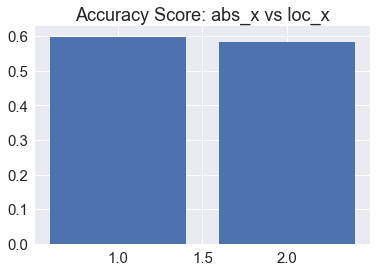

In [30]:
#comparasion of model accuracy scores
x=[1,2]
y=[0.5977351441802545,0.5811962485893295]

plt.bar(x,y)
plt.title('Accuracy Score: abs_x vs loc_x')

In [31]:
#Why is abs_x better than loc_x? abs_x contributes to a higher accuracy score, than loc_x

### 2.  Convert several (including ` ` ) string columns/features into numerical and attempt to use them in fitting a Logistic Regression model. Show histograms (similar to ones above) of made/missed of these new numerical features. Use these histograms to explain and justify why these features could improve the model

In [46]:
#convert 'combined_shot_type' to int64

kobe['combined_shot_type_numeric'] = np.nan

kobe.at[kobe.index[(kobe.combined_shot_type == 'Bank Shot')], 'combined_shot_type_numeric'] = '1'
kobe.at[kobe.index[(kobe.combined_shot_type == 'Dunk')], 'combined_shot_type_numeric'] = '2'
kobe.at[kobe.index[(kobe.combined_shot_type == 'Hook Shot')], 'combined_shot_type_numeric'] = '3'
kobe.at[kobe.index[(kobe.combined_shot_type == 'Jump Shot')], 'combined_shot_type_numeric'] = '4'
kobe.at[kobe.index[(kobe.combined_shot_type == 'Layup')], 'combined_shot_type_numeric'] = '5'
kobe.at[kobe.index[(kobe.combined_shot_type == 'Tip Shot')], 'combined_shot_type_numeric'] = '6'

kobe['combined_shot_type_numeric'] = pd.to_numeric(kobe['combined_shot_type_numeric'])

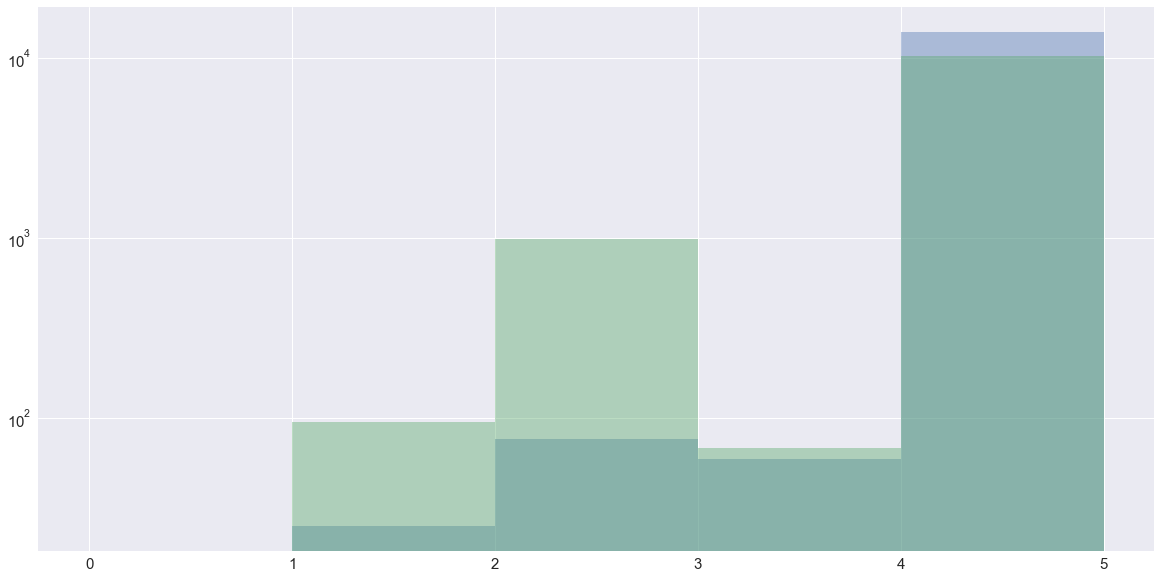

In [66]:
#combined_shot_type_numeric figure shot_made_flag
kobe[kobe.shot_made_flag==0].combined_shot_type_numeric.hist(bins=np.arange(0,6,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].combined_shot_type_numeric.hist(bins=np.arange(0,6,1), alpha=.4, log=True)

In [85]:
#convert season to int64
kobe.at[kobe.index[(kobe.season == '1996-97')], 'season_numeric'] = '1'
kobe.at[kobe.index[(kobe.season == '1997-98')], 'season_numeric'] = '2'
kobe.at[kobe.index[(kobe.season == '1998-99')], 'season_numeric'] = '3'
kobe.at[kobe.index[(kobe.season == '1999-00')], 'season_numeric'] = '4'
kobe.at[kobe.index[(kobe.season == '2000-01')], 'season_numeric'] = '5'
kobe.at[kobe.index[(kobe.season == '2001-02')], 'season_numeric'] = '6'
kobe.at[kobe.index[(kobe.season == '2002-03')], 'season_numeric'] = '7'
kobe.at[kobe.index[(kobe.season == '2003-04')], 'season_numeric'] = '8'
kobe.at[kobe.index[(kobe.season == '2004-05')], 'season_numeric'] = '9'
kobe.at[kobe.index[(kobe.season == '2005-06')], 'season_numeric'] = '10'
kobe.at[kobe.index[(kobe.season == '2006-07')], 'season_numeric'] = '11'
kobe.at[kobe.index[(kobe.season == '2007-08')], 'season_numeric'] = '12'
kobe.at[kobe.index[(kobe.season == '2008-09')], 'season_numeric'] = '13'
kobe.at[kobe.index[(kobe.season == '2009-10')], 'season_numeric'] = '14'
kobe.at[kobe.index[(kobe.season == '2010-11')], 'season_numeric'] = '15'
kobe.at[kobe.index[(kobe.season == '2011-12')], 'season_numeric'] = '16'
kobe.at[kobe.index[(kobe.season == '2012-13')], 'season_numeric'] = '17'
kobe.at[kobe.index[(kobe.season == '2013-14')], 'season_numeric'] = '18'
kobe.at[kobe.index[(kobe.season == '2014-15')], 'season_numeric'] = '19'
kobe.at[kobe.index[(kobe.season == '2015-16')], 'season_numeric'] = '20'

kobe['season_numeric'] = pd.to_numeric(kobe['season_numeric'])

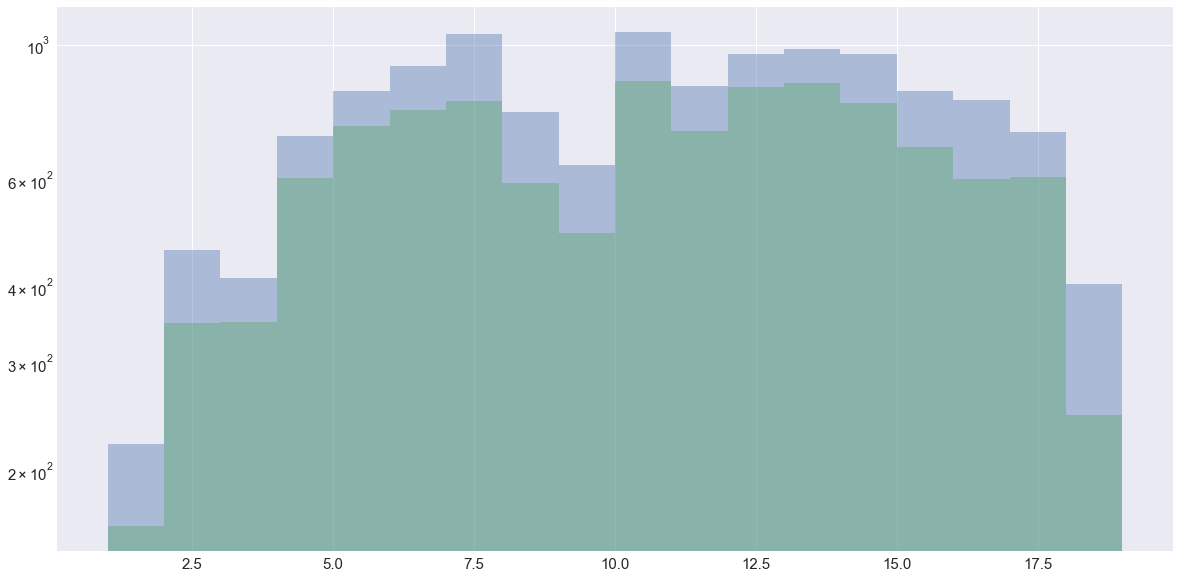

In [102]:
#season_numeric figure
kobe[kobe.shot_made_flag==0].season_numeric.hist(bins=np.arange(1,20,1), alpha=.4, log=True)
kobe[kobe.shot_made_flag==1].season_numeric.hist(bins=np.arange(1,20,1), alpha=.4, log=True)

In [98]:
#game_date to useable format
kobe['game_date'] = pd.to_datetime(kobe['game_date'])


action_type                           object
combined_shot_type                    object
game_event_id                          int64
game_id                                int64
lat                                  float64
loc_x                                  int64
loc_y                                  int64
lon                                  float64
minutes_remaining                      int64
period                                 int64
playoffs                               int64
season                                object
seconds_remaining                      int64
shot_distance                          int64
shot_made_flag                       float64
shot_type                             object
shot_zone_area                        object
shot_zone_basic                       object
shot_zone_range                       object
team_id                                int64
team_name                             object
game_date                     datetime64[ns]
matchup   

In [104]:
# fit a linear regression model and store the predictions
feature_cols = ['combined_shot_type_numeric','season_numeric']
X = kobe[feature_cols]
y = kobe.shot_made_flag

model = Model()
model.fit(X, y)
kobe['pred'] = model.predict(X)


from sklearn.metrics import accuracy_score
accuracy_score(kobe.shot_made_flag, kobe.pred.round())

0.5922870373973615

In [78]:
kobe.dtypes

action_type                    object
combined_shot_type             object
game_event_id                   int64
game_id                         int64
lat                           float64
loc_x                           int64
loc_y                           int64
lon                           float64
minutes_remaining               int64
period                          int64
playoffs                        int64
season                         object
seconds_remaining               int64
shot_distance                   int64
shot_made_flag                float64
shot_type                      object
shot_zone_area                 object
shot_zone_basic                object
shot_zone_range                object
team_id                         int64
team_name                      object
game_date                      object
matchup                        object
opponent                       object
shot_id                         int64
pred                          float64
abs_x       

### 3. Show a 3 dimensional surface plot [https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots] of probabilities from a trained Logistic Regression model using only `abs_x` and `loc_y`. The probabilities arise from a distributed grid of `x` values and `y` values as input to the `predict_proba()` function.